#                               GROUP 'G' Impact of immigration on housing market in Canada


##                                           Table of Contents:


* [1. Installing Packages](#first-bullet)
* [2. Importing Libraries](#second-bullet)
* [3. Loading Data](#third-bullet)
* [4. Data Visualisation](#fourth-bullet)
* [5. Data Understanding](#fifth-bullet)
* [6. Data Engineering](#sixth-bullet)
* [7. OLS Regression Model](#seventh-bullet)
* [8. Decision-Tree Regressor Model](#eight-bullet)

## 1. Installing Python package 📦 manager for data manipulation and analysis that provides data structures like DataFrames.¶<a class="anchor" id="first-bullet"></a>

In [1]:
pip install emoji --upgrade

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\abc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\abc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\abc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## 2. Importing libraries. 📖 <a class="anchor" id="second-bullet"></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 3. Loading the data. 💻¶<a class="anchor" id="third-bullet"></a>

In [5]:
df = pd.read_csv('Merged_Final.csv')

The code reads the CSV file 'Merged_Final.csv' and stores its content in a pandas DataFrame called df.

## 4. Data Visualisation📊<a class="anchor" id="fourth-bullet"></a>

The code displays the first five rows of the DataFrame df.

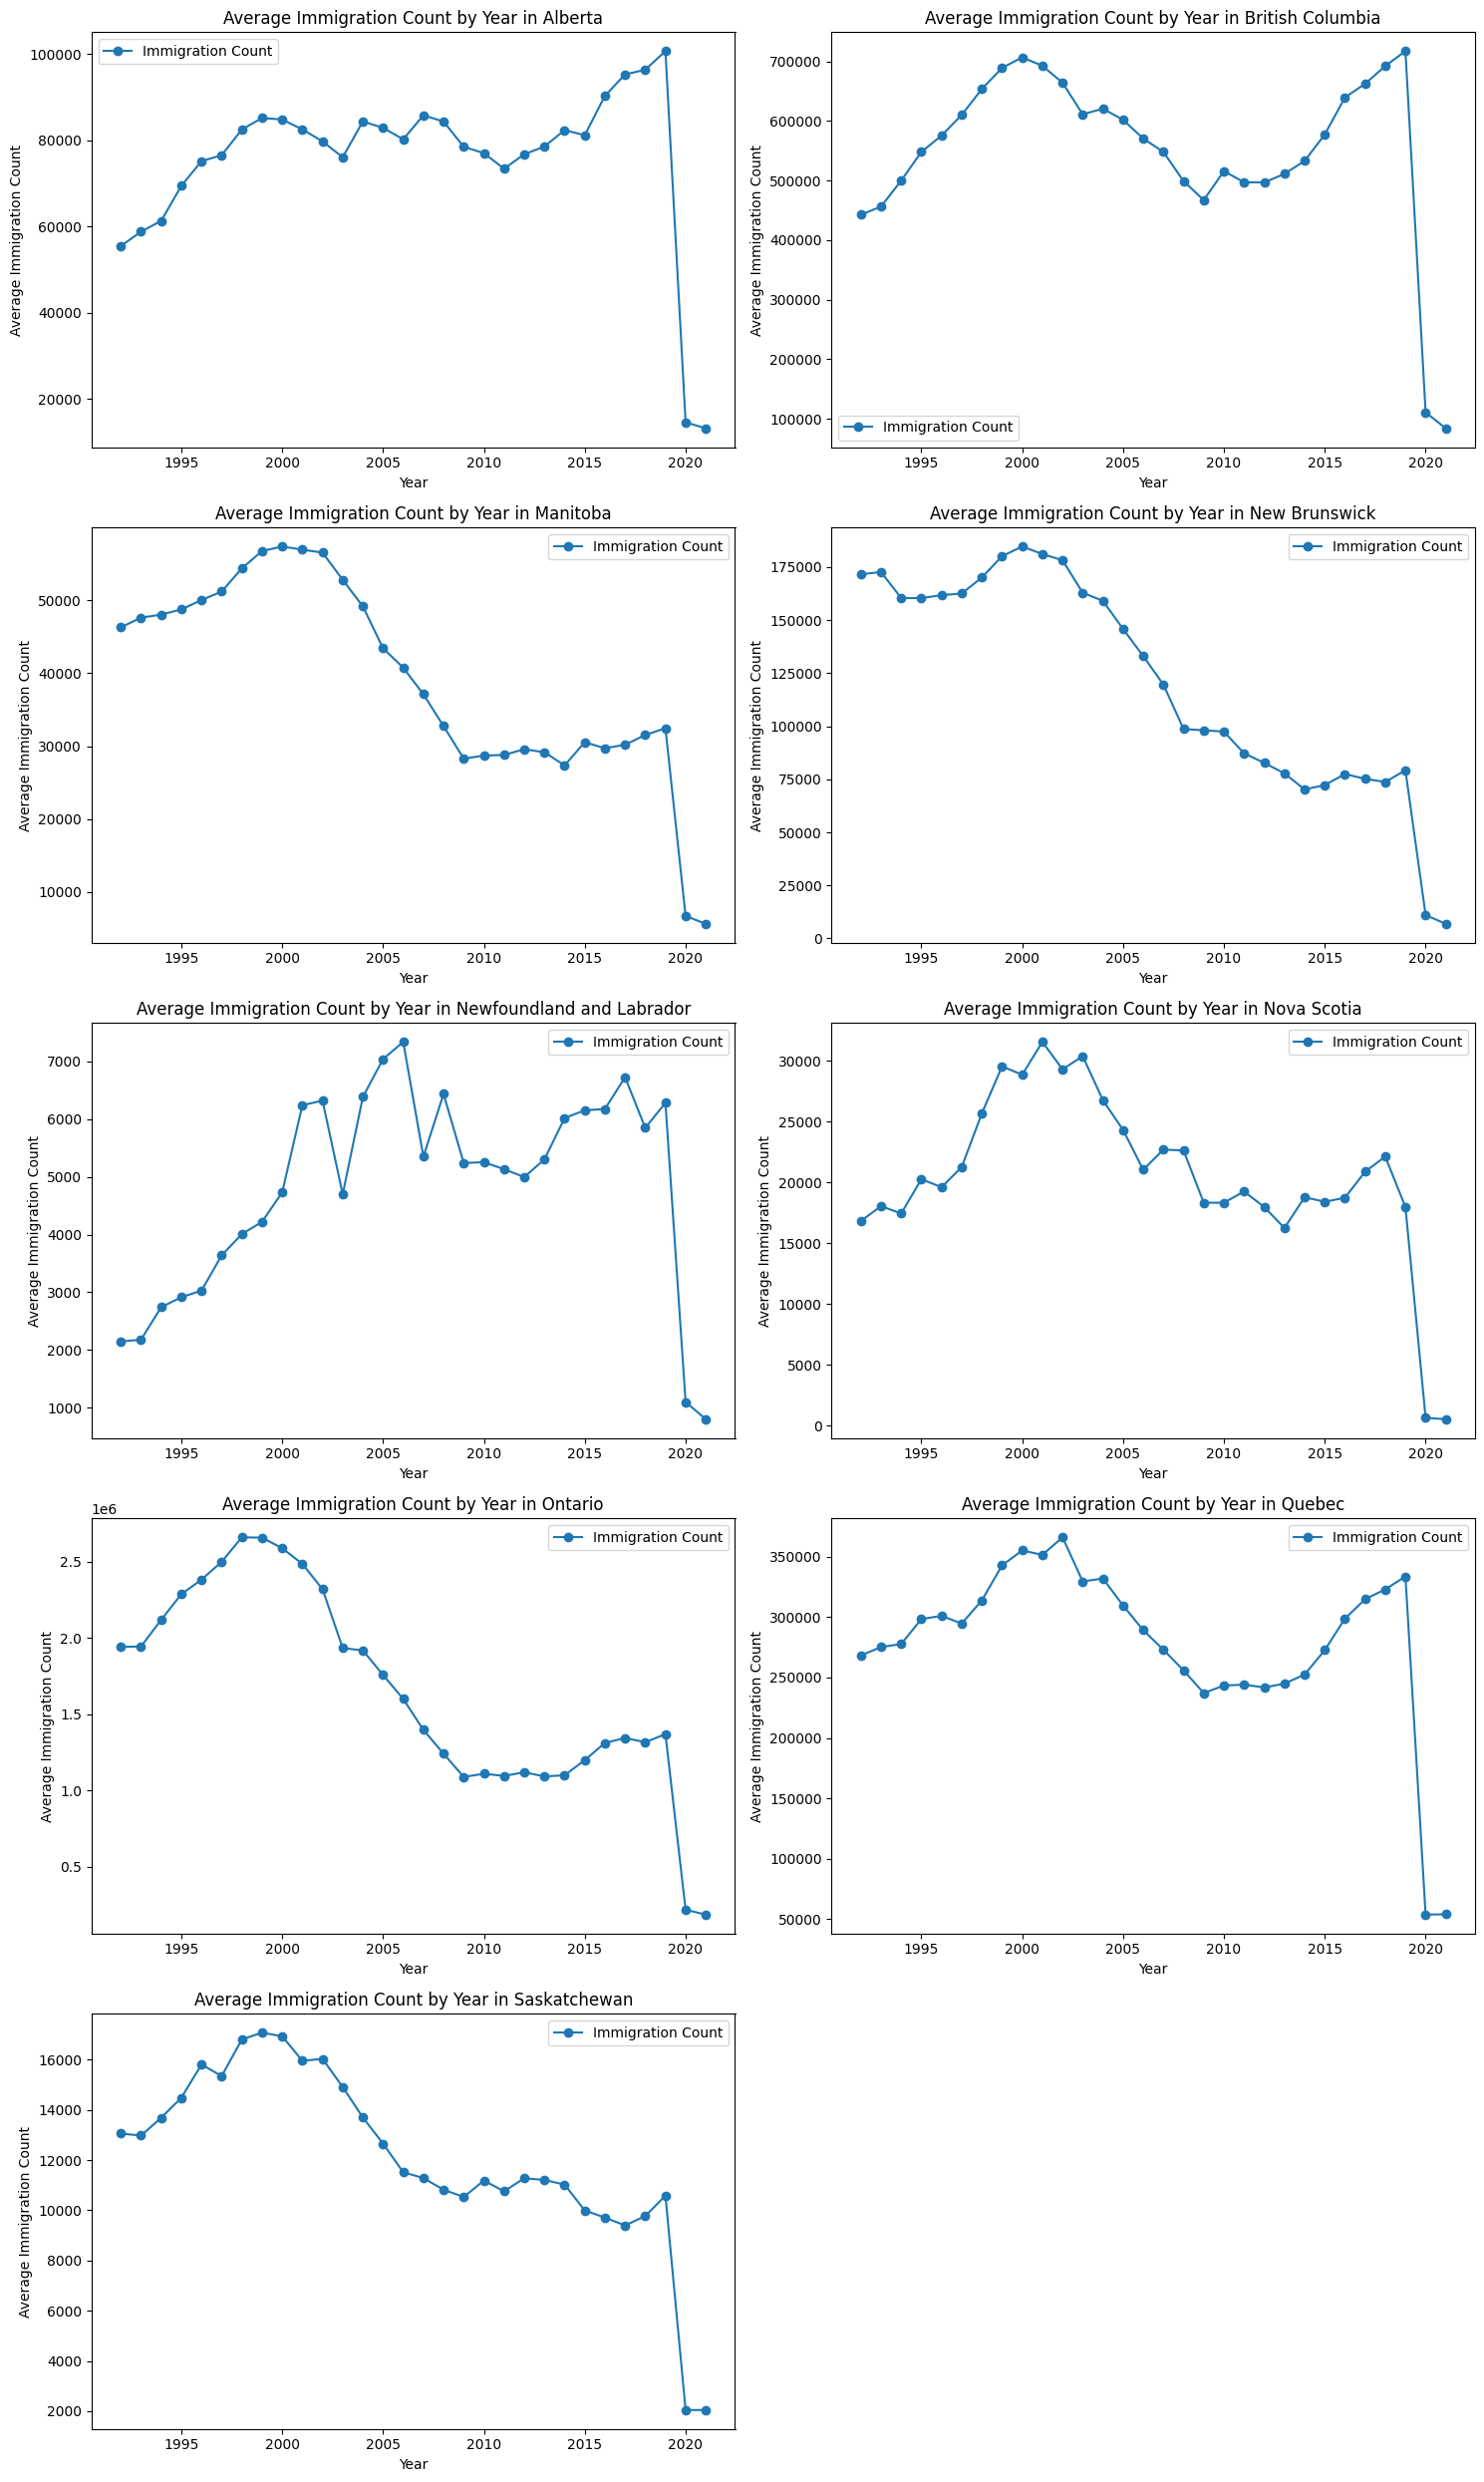

In [6]:
#IMMIGRATION LEVELS
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (assuming your dataframe is named 'df')
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%d-%m-%Y')

# Extract the year from the 'REF_DATE' column
df['Year'] = df['REF_DATE'].dt.year

# Group by year and GEO (province) and calculate the average for each column
df_yearly_province = df.groupby(['Year', 'GEO']).mean().reset_index()

# Unique provinces for creating separate plots
provinces = df['GEO'].unique()

# Dynamically calculate the number of rows and columns needed for subplots
num_provinces = len(provinces)
cols = 2  # Set number of columns for subplots
rows = (num_provinces + 1) // cols  # Calculate the number of rows needed

# Create subplots for each province
plt.figure(figsize=(15, rows * 5))  # Adjust the figure size based on the number of rows

# Loop through each province and plot its data
for i, province in enumerate(provinces, 1):
    plt.subplot(rows, cols, i)
    province_data = df_yearly_province[df_yearly_province['GEO'] == province]
    
    # Immigration Count Plot
    plt.plot(province_data['Year'], province_data['ImmigrationCount'], marker='o', label='Immigration Count')
    plt.title(f'Average Immigration Count by Year in {province}')
    plt.xlabel('Year')
    plt.ylabel('Average Immigration Count')
    plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

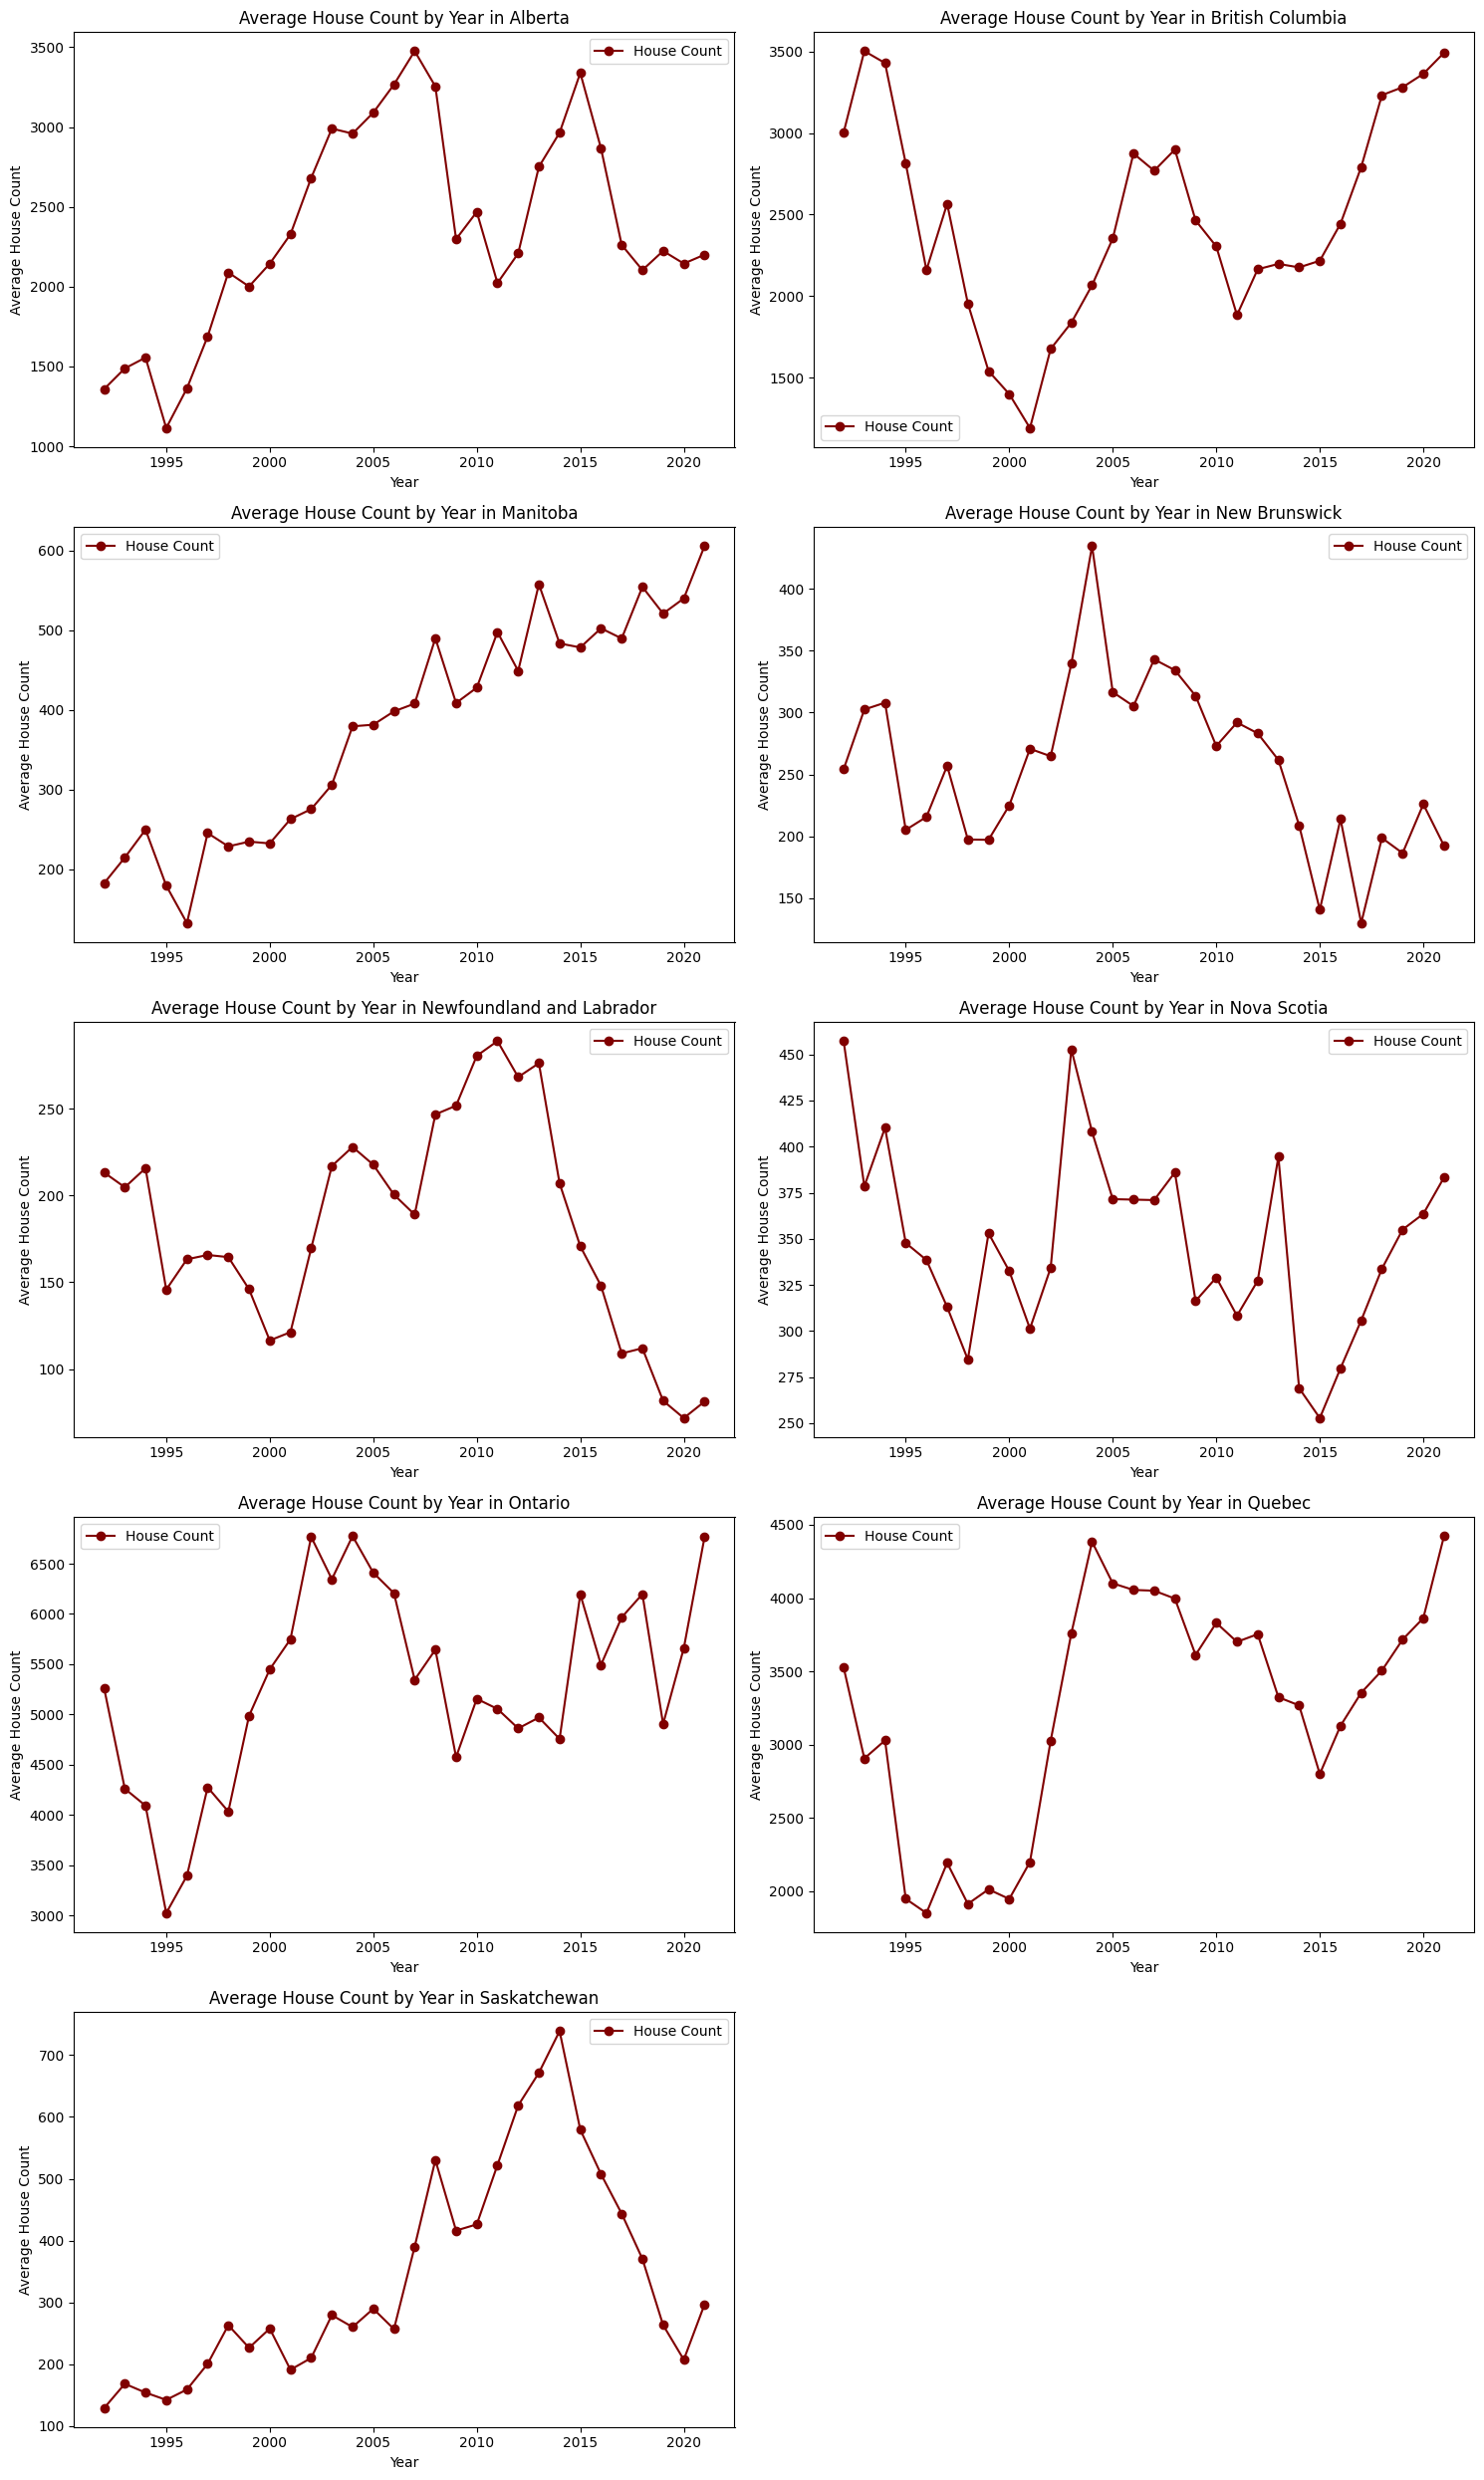

In [7]:
##HOUSE COUNT
# Sample data (assuming your dataframe is named 'df')
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%d-%m-%Y')

# Extract the year from the 'REF_DATE' column
df['Year'] = df['REF_DATE'].dt.year

# Group by year and GEO (province) and calculate the average for each column
df_yearly_province = df.groupby(['Year', 'GEO']).mean().reset_index()

# Unique provinces for creating separate plots
provinces = df['GEO'].unique()

# Dynamically calculate the number of rows and columns needed for subplots
num_provinces = len(provinces)
cols = 2  # Set number of columns for subplots
rows = (num_provinces + 1) // cols  # Calculate the number of rows needed

# Create subplots for each province
plt.figure(figsize=(15, rows * 5))  # Adjust the figure size based on the number of rows

# Loop through each province and plot its data
for i, province in enumerate(provinces, 1):
    plt.subplot(rows, cols, i)
    province_data = df_yearly_province[df_yearly_province['GEO'] == province]
    
    # House Count Plot (updated from Immigration Count)
    plt.plot(province_data['Year'], province_data['HouseCount'], marker='o', label='House Count', 
             color='maroon', linestyle='-', markersize=6)
    plt.title(f'Average House Count by Year in {province}')
    plt.xlabel('Year')
    plt.ylabel('Average House Count')
    plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

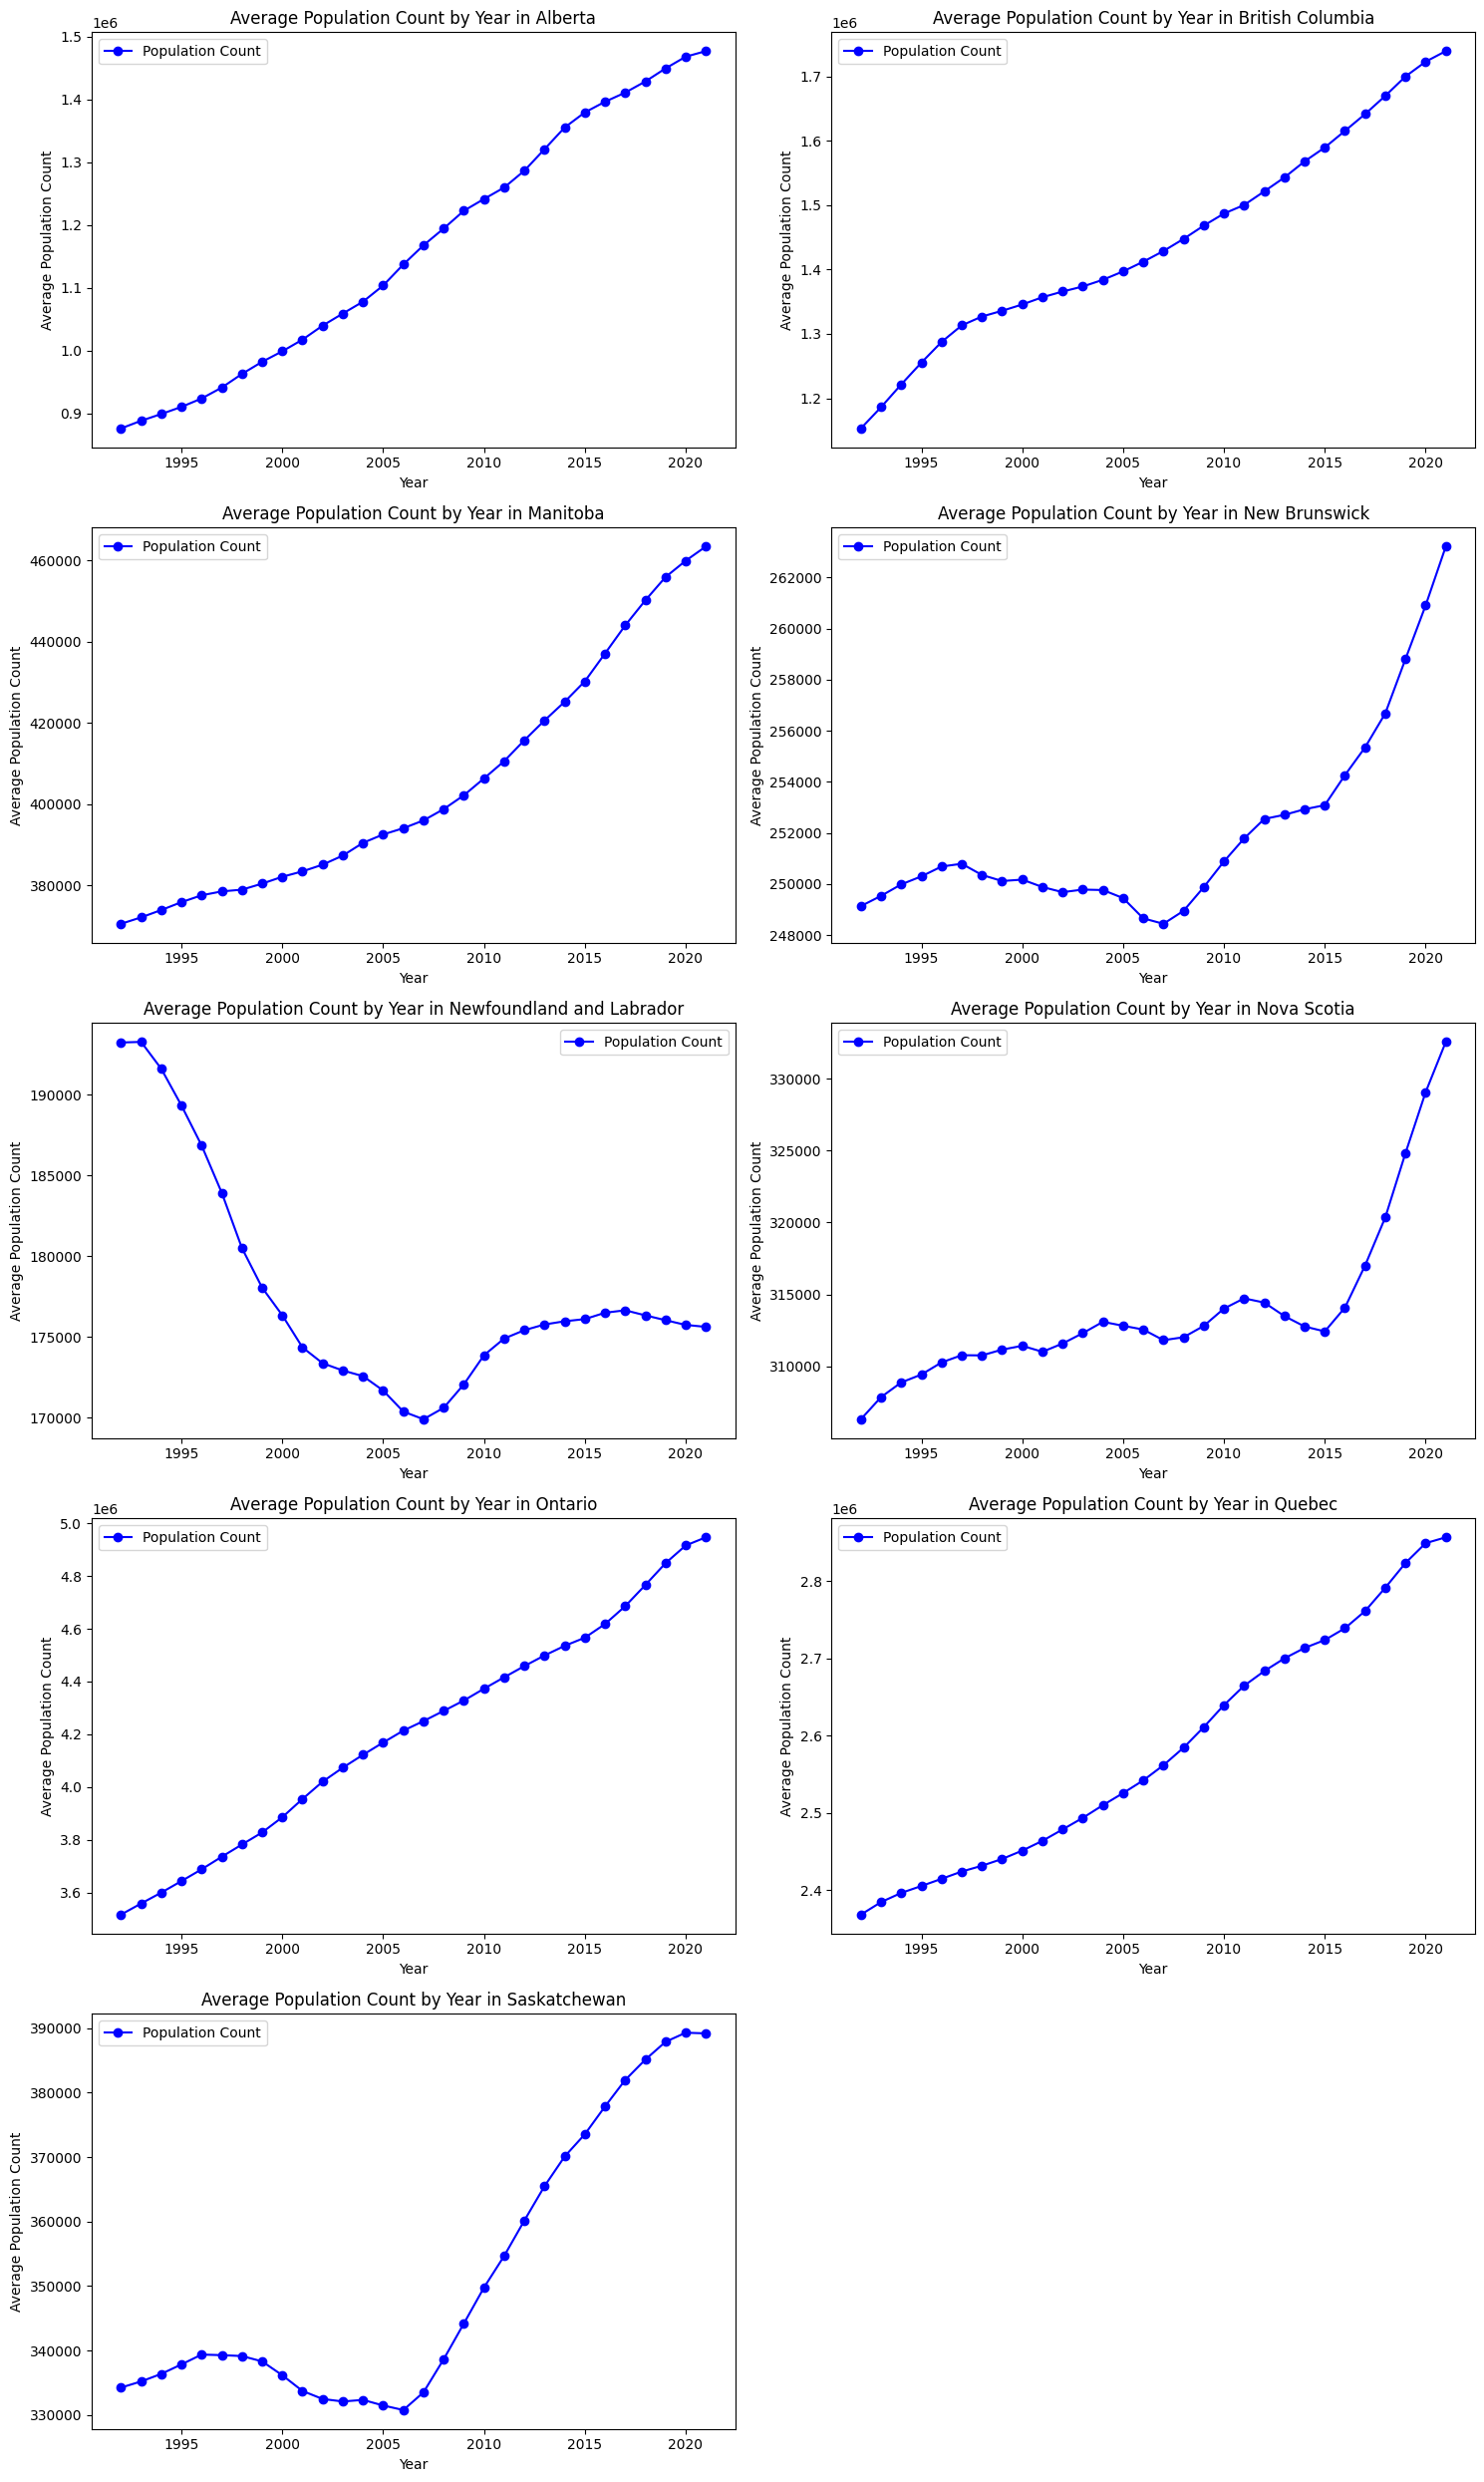

In [8]:
#POPULATION COUNT

import pandas as pd
import matplotlib.pyplot as plt

df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%d-%m-%Y')
df['Year'] = df['REF_DATE'].dt.year

# Group by year and GEO (province) and calculate the average for each column
df_yearly_province = df.groupby(['Year', 'GEO']).mean().reset_index()

provinces = df['GEO'].unique()

# Dynamically calculate the number of rows and columns needed for subplots
num_provinces = len(provinces)
cols = 2  # Set number of columns for subplots
rows = (num_provinces + 1) // cols  # Calculate the number of rows needed

# Create subplots for each province
plt.figure(figsize=(15, rows * 5))  # Adjust the figure size based on the number of rows

# Loop through each province and plot its data
for i, province in enumerate(provinces, 1):
    plt.subplot(rows, cols, i)
    province_data = df_yearly_province[df_yearly_province['GEO'] == province]
    
    # Population Count Plot with one color for all provinces
    plt.plot(province_data['Year'], province_data['PopulationCount'], marker='o', label='Population Count', 
             color='blue', linestyle='-', markersize=6)
    plt.title(f'Average Population Count by Year in {province}')
    plt.xlabel('Year')
    plt.ylabel('Average Population Count')
    plt.legend()

plt.tight_layout()
plt.show()

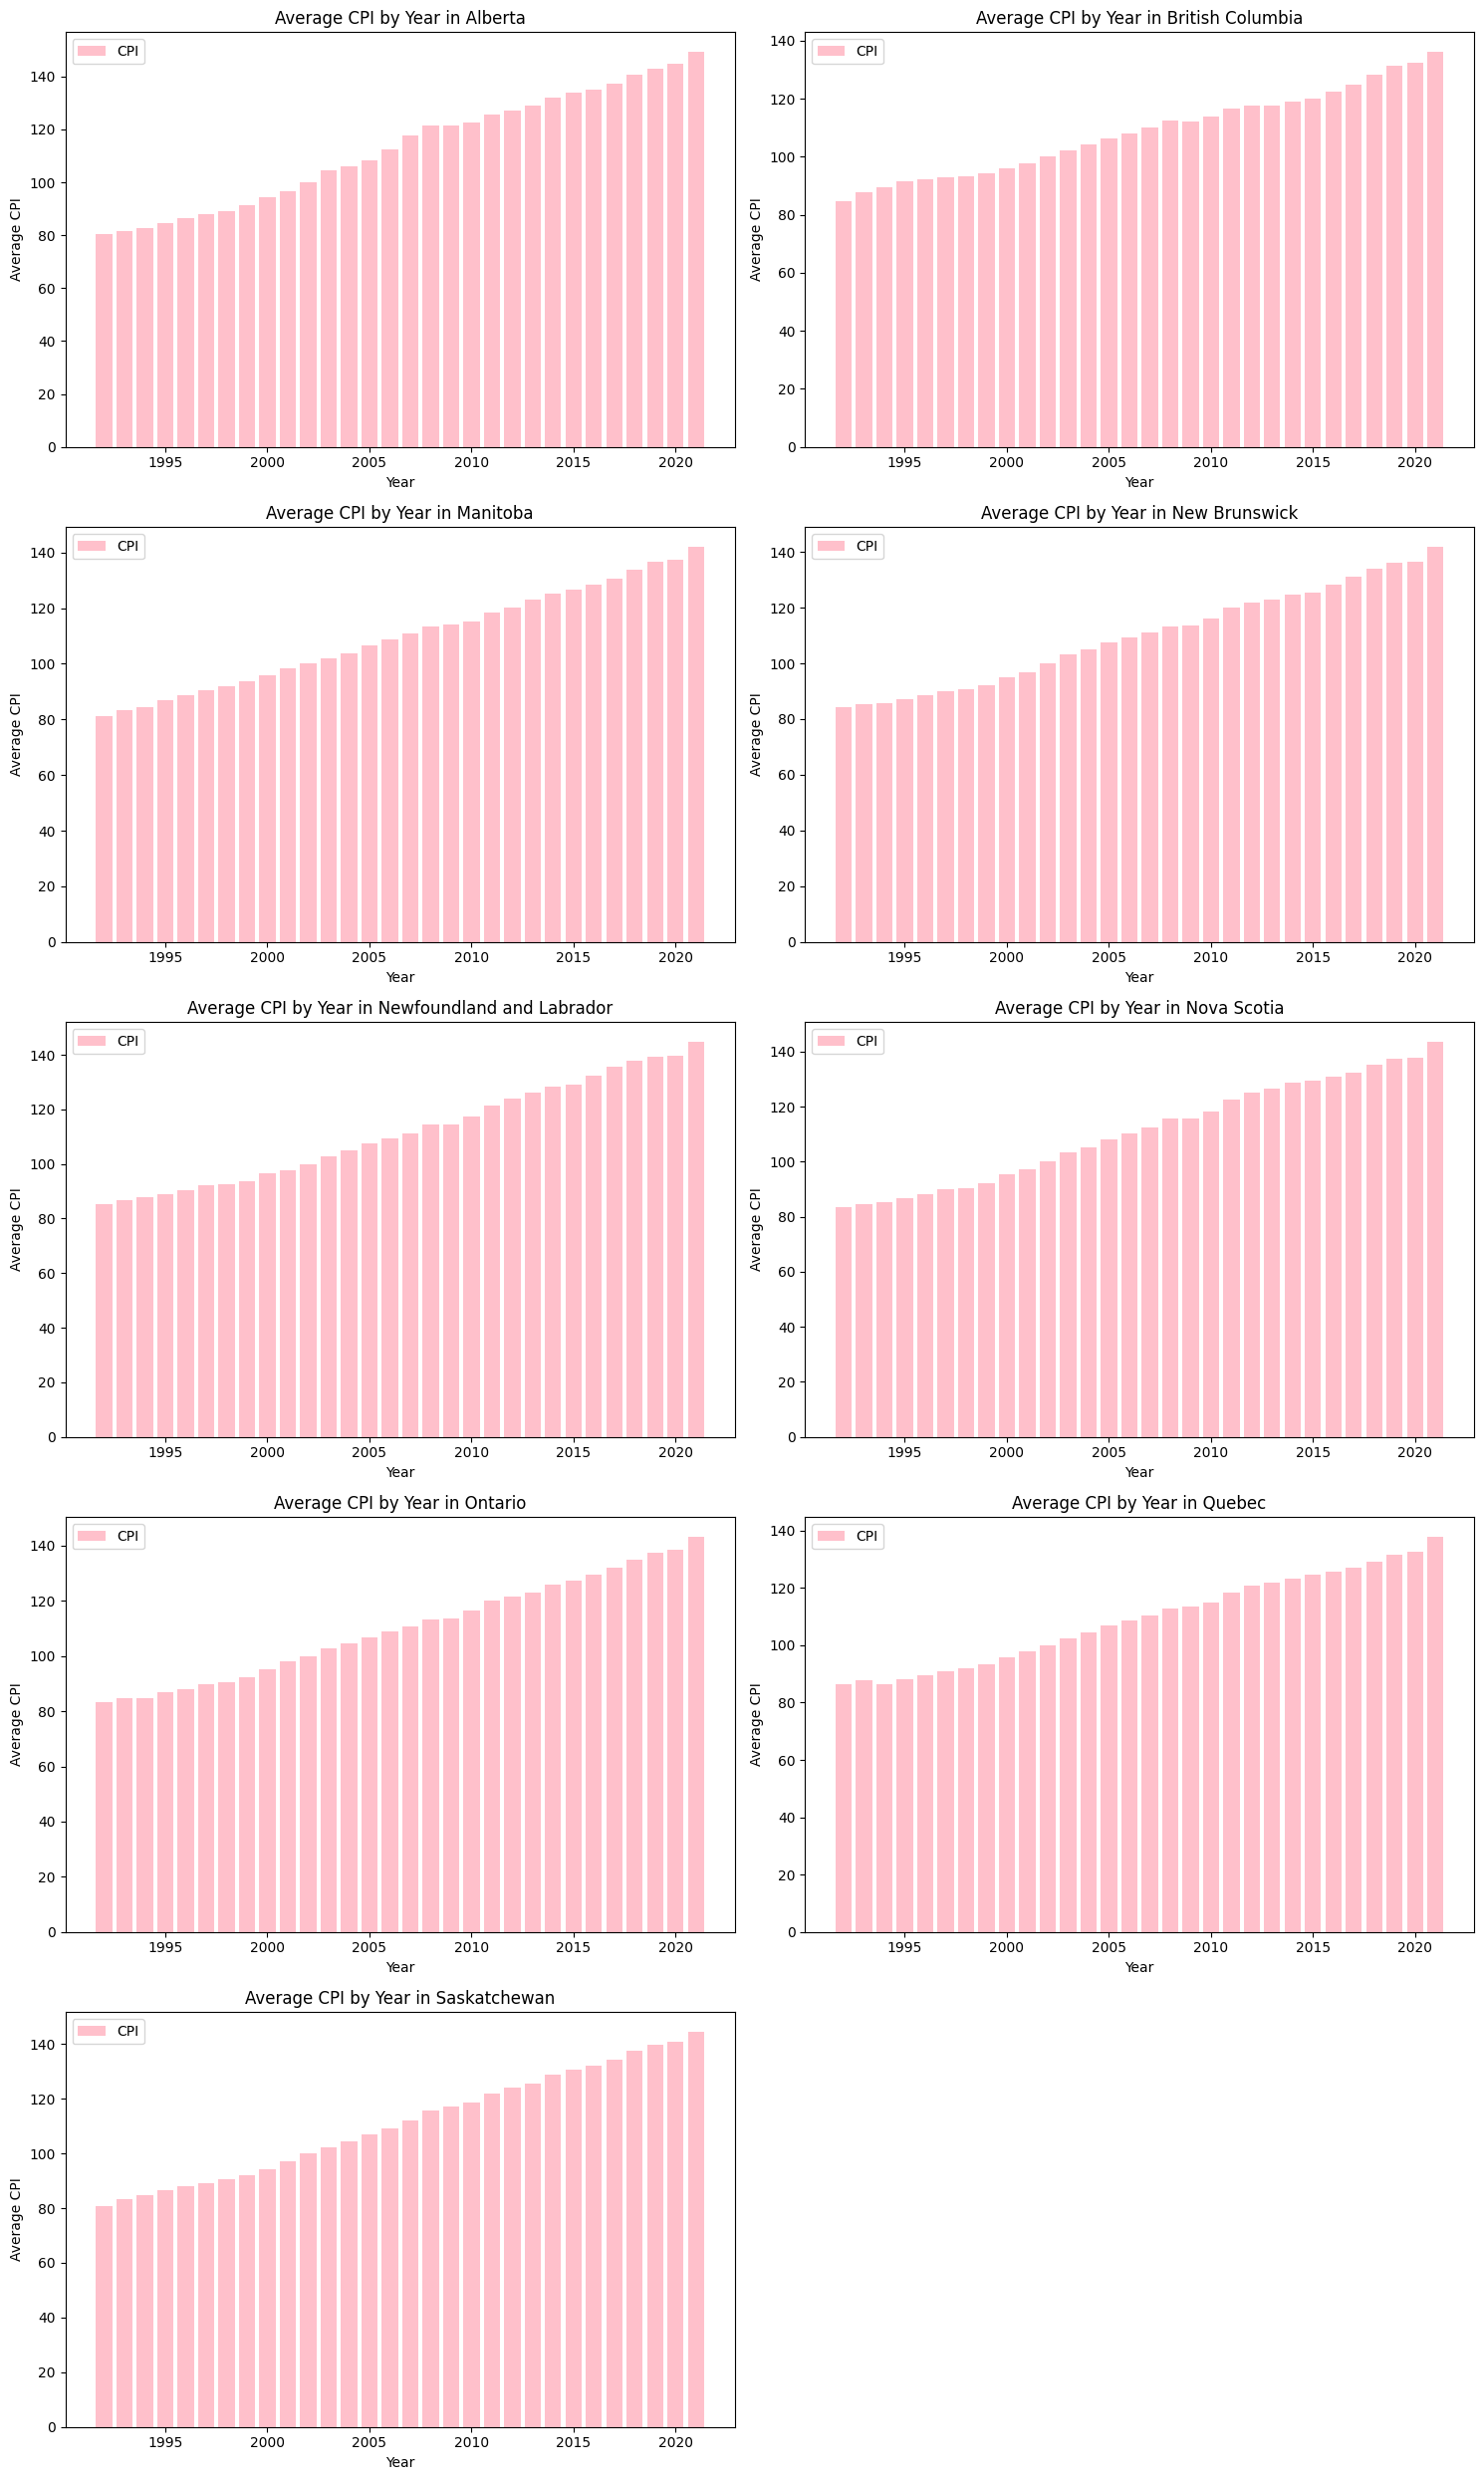

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%d-%m-%Y')
df['Year'] = df['REF_DATE'].dt.year

# Group by year and GEO (province) and calculate the average for each column
df_yearly_province = df.groupby(['Year', 'GEO']).mean().reset_index()

provinces = df['GEO'].unique()

# Dynamically calculate the number of rows and columns needed for subplots
num_provinces = len(provinces)
cols = 2  # Set number of columns for subplots
rows = (num_provinces + 1) // cols  # Calculate the number of rows needed

# Create subplots for each province
plt.figure(figsize=(15, rows * 5))  # Adjust the figure size based on the number of rows

# Loop through each province and plot its data as a bar chart with pink color
for i, province in enumerate(provinces, 1):
    plt.subplot(rows, cols, i)
    province_data = df_yearly_province[df_yearly_province['GEO'] == province]
    
    # Bar chart for CPI with pink color
    plt.bar(province_data['Year'], province_data['CPI'], label='CPI', color='pink')
    plt.title(f'Average CPI by Year in {province}')
    plt.xlabel('Year')
    plt.ylabel('Average CPI')
    plt.legend()

plt.tight_layout()
plt.show()

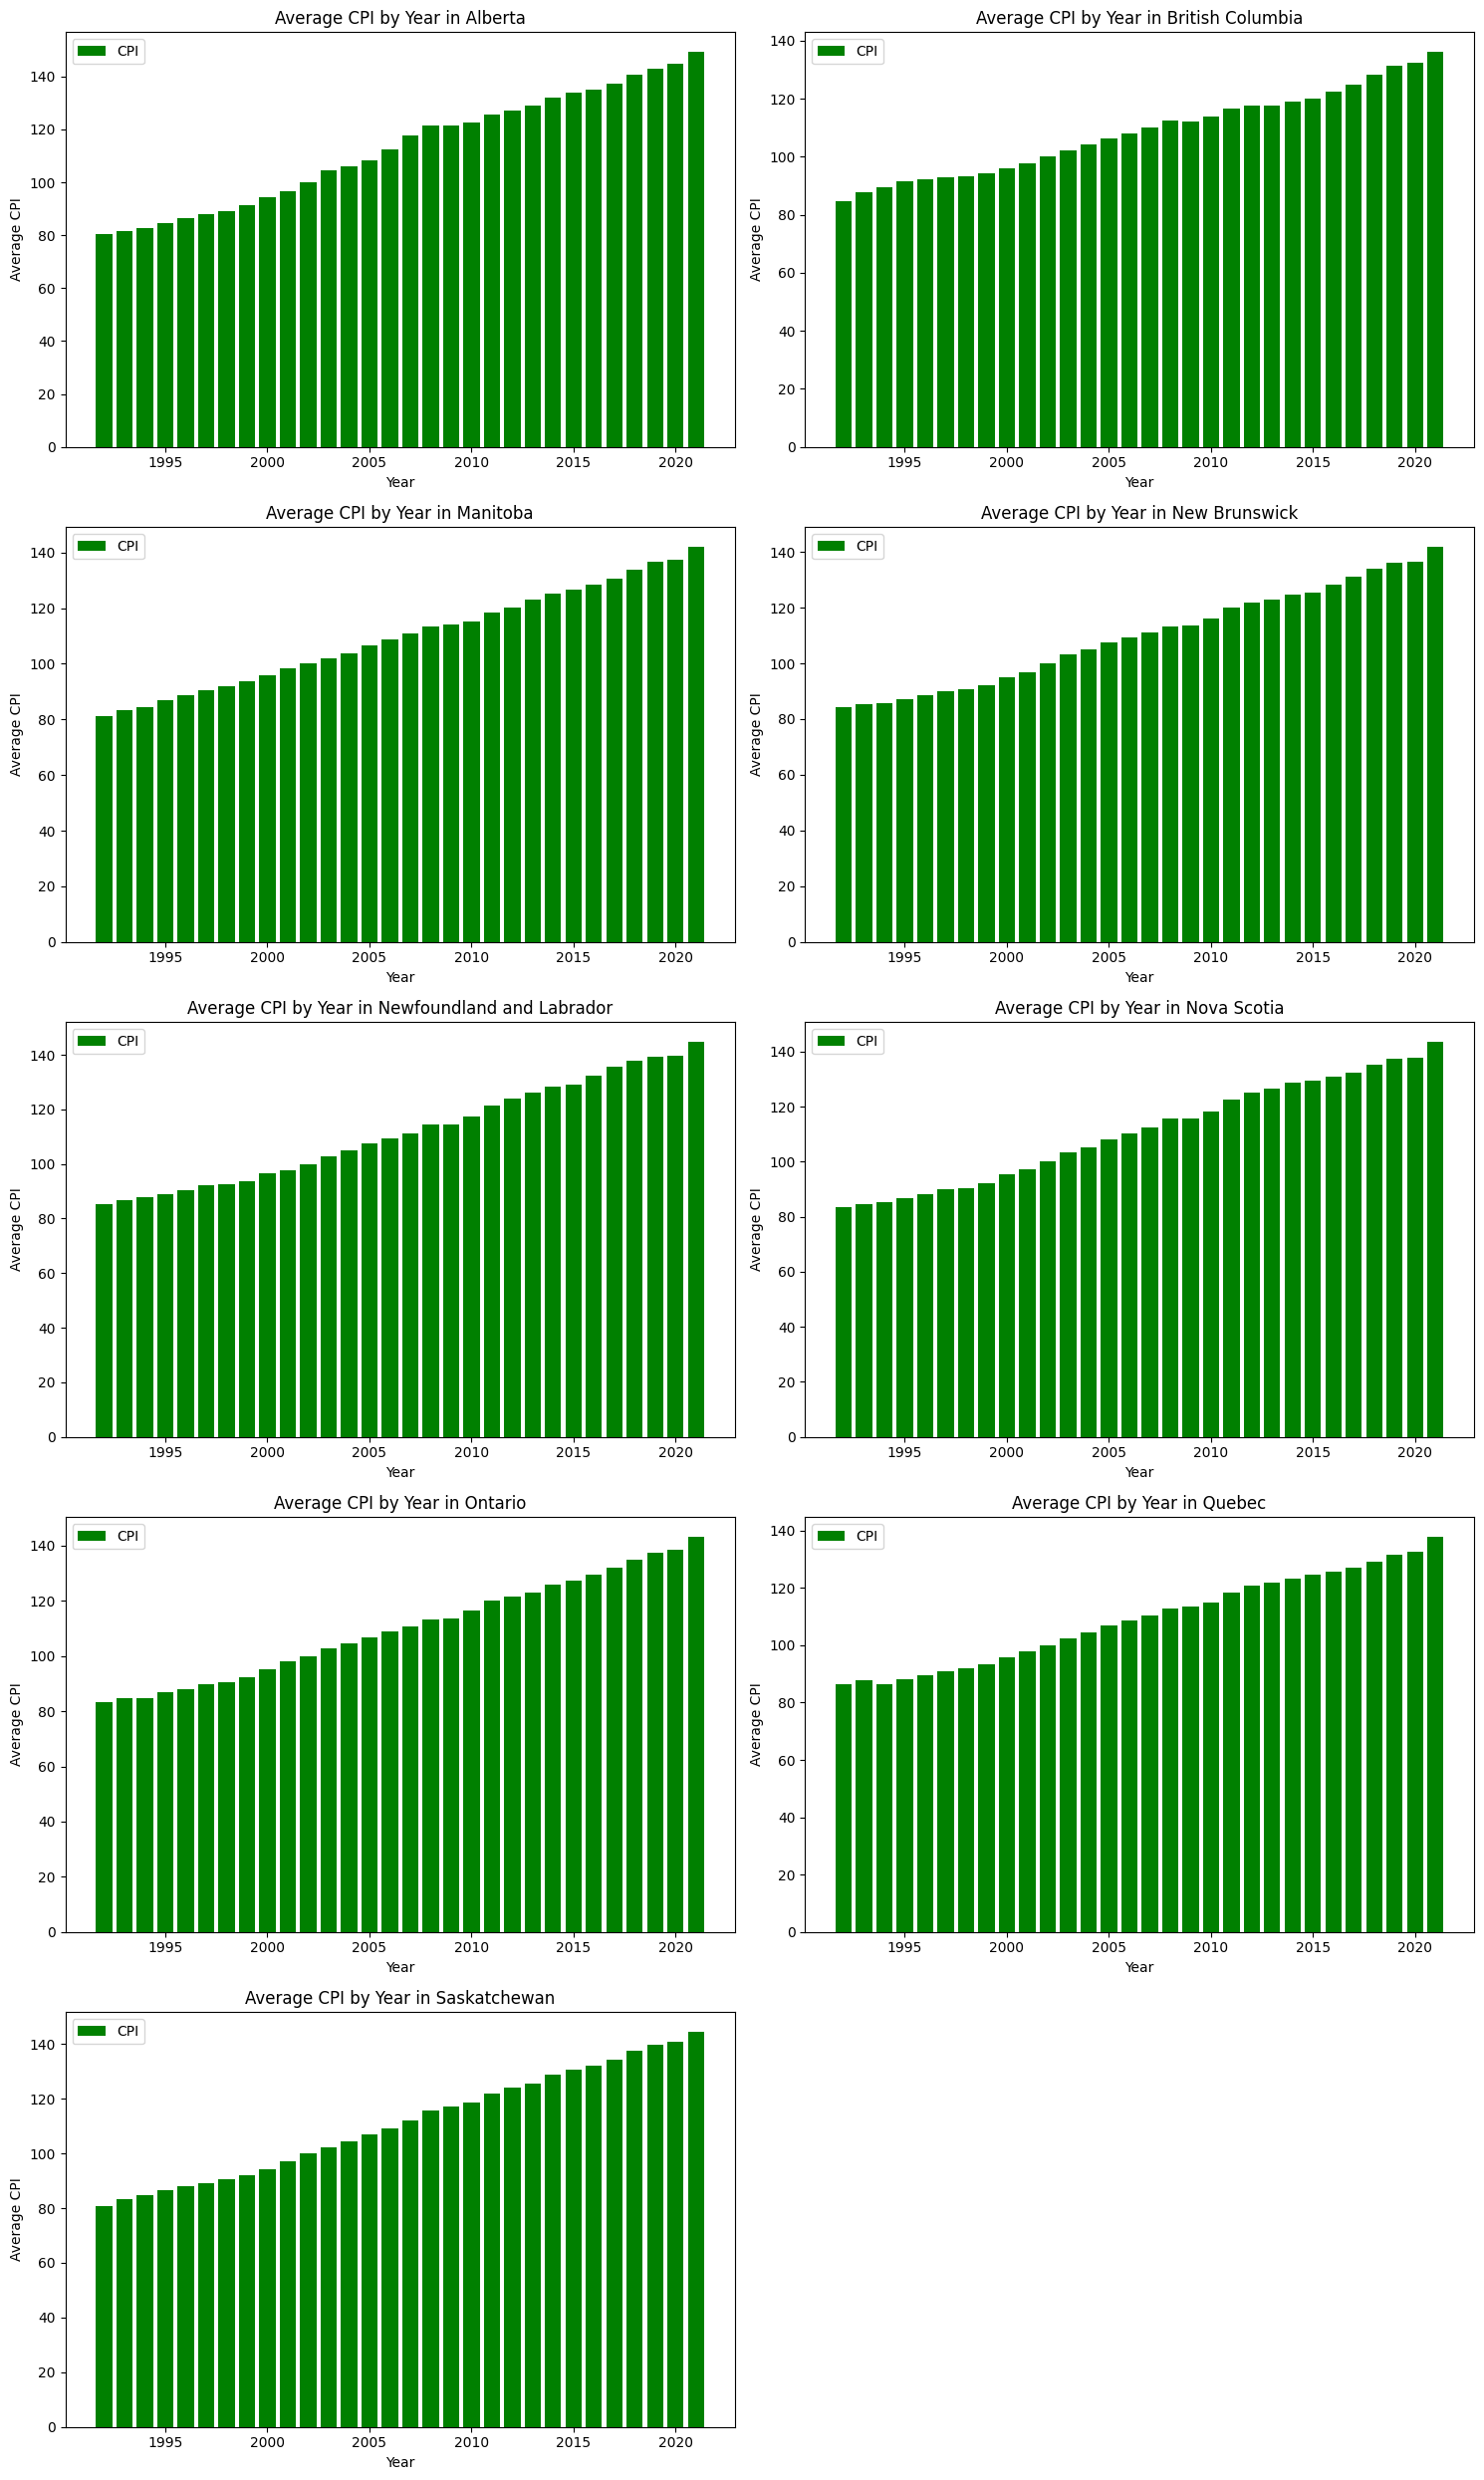

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%d-%m-%Y')
df['Year'] = df['REF_DATE'].dt.year

# Group by year and GEO (province) and calculate the average for each column
df_yearly_province = df.groupby(['Year', 'GEO']).mean().reset_index()

provinces = df['GEO'].unique()

# Dynamically calculate the number of rows and columns needed for subplots
num_provinces = len(provinces)
cols = 2  # Set number of columns for subplots
rows = (num_provinces + 1) // cols  # Calculate the number of rows needed

# Create subplots for each province
plt.figure(figsize=(15, rows * 5))  # Adjust the figure size based on the number of rows

# Loop through each province and plot its data as a bar chart
for i, province in enumerate(provinces, 1):
    plt.subplot(rows, cols, i)
    province_data = df_yearly_province[df_yearly_province['GEO'] == province]
    
    # Bar chart for CPI with one color for all provinces
    plt.bar(province_data['Year'], province_data['CPI'], label='CPI', color='green')
    plt.title(f'Average CPI by Year in {province}')
    plt.xlabel('Year')
    plt.ylabel('Average CPI')
    plt.legend()

plt.tight_layout()
plt.show()

## 5. Data Understanding - - Exploring the data. 🌍 🔭¶<a class="anchor" id="fifth-bullet"></a>

In [11]:
print(df.head())

    REF_DATE      GEO  ImmigrationCount  HouseCount  PopulationCount   CPI  \
0 1992-01-01  Alberta             51627        1005           870595  79.8   
1 1992-02-01  Alberta             51201        1005           870595  80.0   
2 1992-03-01  Alberta             52846        1005           870595  80.4   
3 1992-04-01  Alberta             55102        1201           873590  80.3   
4 1992-05-01  Alberta             55597        1201           873590  80.4   

   HousePriceIndex  Year  
0             36.1  1992  
1             36.0  1992  
2             36.4  1992  
3             36.4  1992  
4             36.6  1992  


In [12]:
# Summary of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   REF_DATE          3240 non-null   datetime64[ns]
 1   GEO               3240 non-null   object        
 2   ImmigrationCount  3240 non-null   int64         
 3   HouseCount        3240 non-null   int64         
 4   PopulationCount   3240 non-null   int64         
 5   CPI               3240 non-null   float64       
 6   HousePriceIndex   3240 non-null   float64       
 7   Year              3240 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 202.6+ KB
None


The code provides a concise summary of the DataFrame df, including the number of non-null entries, data types of each column, and memory usage.

In [13]:
# Summary of numerical columns
print(df.describe())

       ImmigrationCount   HouseCount  PopulationCount          CPI  \
count      3.240000e+03  3240.000000     3.240000e+03  3240.000000   
mean       3.048062e+05  1650.269444     1.210856e+06   110.491790   
std        5.523675e+05  1824.076486     1.307146e+06    18.083884   
min        1.800000e+01    41.000000     1.696820e+05    79.600000   
25%        1.647150e+04   259.500000     3.109128e+05    93.200000   
50%        7.349100e+04   514.000000     3.947450e+05   110.300000   
75%        3.042798e+05  2737.250000     1.565197e+06   125.825000   
max        2.812196e+06  9275.000000     4.979438e+06   151.700000   

       HousePriceIndex         Year  
count      3240.000000  3240.000000  
mean         78.771543  2006.500000  
std          22.796645     8.656777  
min          33.500000  1992.000000  
25%          55.900000  1999.000000  
50%          84.800000  2006.500000  
75%          98.200000  2014.000000  
max         144.100000  2021.000000  


The code generates and prints summary statistics (like mean, standard deviation, min, max, etc.) for the numerical columns in the DataFrame df.
The df.describe() output provides a statistical summary of the numerical columns in the dataset. The ImmigrationCount varies from 18 to 2.81 million, with a mean of 304,806 and a high standard deviation of 552,368, indicating significant variation. HouseCount ranges from 41 to 9,275, with a mean of 1,650 and a standard deviation of 1,824, suggesting diverse housing data. PopulationCount spans from 169,682 to 4.98 million, with a mean of 1.21 million and a standard deviation of 1.31 million, showing considerable population variation across the dataset. CPI ranges from 79.6 to 151.7, with an average of 110.49 and a standard deviation of 18.08, reflecting moderate inflation differences. The HousePriceIndex varies between 33.5 and 144.1, with a mean of 78.77 and a standard deviation of 22.80, indicating varying housing market trends. Overall, the summary reveals considerable variation in the data, which is typical for economic and demographic datasets.

In [14]:
# Checking for missing values
print(df.isnull().sum())

REF_DATE            0
GEO                 0
ImmigrationCount    0
HouseCount          0
PopulationCount     0
CPI                 0
HousePriceIndex     0
Year                0
dtype: int64


This code checks for missing values in each column of the DataFrame df and prints the count of missing values per column.

In [15]:
# Number of records and features

df.shape

(3240, 8)

This code returns the number of records (rows) and features (columns) in the DataFrame df as a tuple.

In [16]:
# List of Columns.

df.columns

Index(['REF_DATE', 'GEO', 'ImmigrationCount', 'HouseCount', 'PopulationCount',
       'CPI', 'HousePriceIndex', 'Year'],
      dtype='object')

This code displays a list of all column names in the DataFrame df

This code converts the REF_DATE column in df to a datetime format using the specified day-month-year format and then prints the data types of all columns to verify the change.

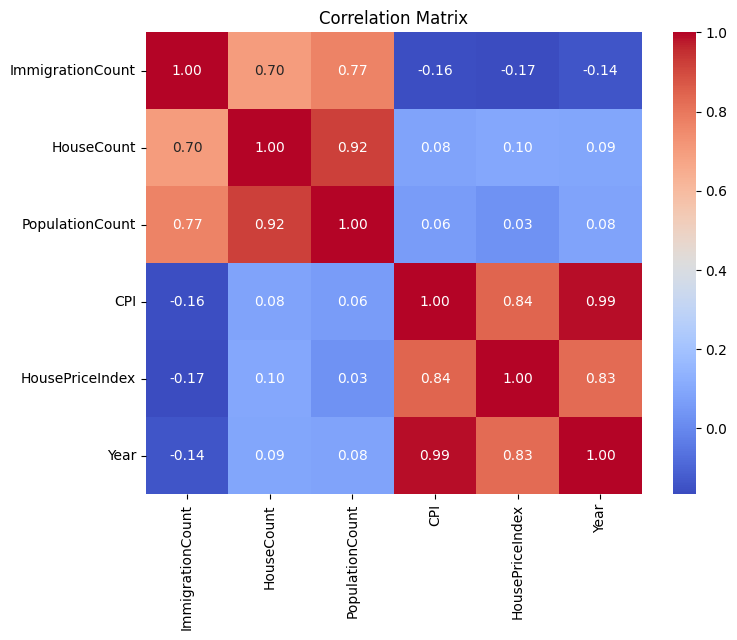

In [17]:
correlation_matrix = df.drop(columns=['REF_DATE']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

This code calculates the correlation matrix for all numerical columns in df (excluding REF_DATE), then plots it as a heatmap with annotation values, a color gradient (coolwarm), and a title.

The correlation analysis shows some important connections in the data: population growth is closely linked to housing demand, shown by a high correlation (0.92) between HouseCount and PopulationCount. This suggests that as the population grows, the need for housing also increases. Additionally, there’s a strong correlation (0.84) between the Consumer Price Index (CPI) and the House Price Index, meaning that as general prices rise, housing costs tend to go up as well, which can impact affordability. Immigration also plays a role, with moderate correlations to both population (0.77) and housing demand (0.70), showing that immigration contributes to growth in these areas, though it doesn’t directly influence CPI or housing prices as much. Overall, these patterns highlight how population growth, immigration, and economic factors all influence housing demand and affordability.

In [18]:
print(correlation_matrix)

                  ImmigrationCount  HouseCount  PopulationCount       CPI  \
ImmigrationCount          1.000000    0.702224         0.770587 -0.161480   
HouseCount                0.702224    1.000000         0.921212  0.080199   
PopulationCount           0.770587    0.921212         1.000000  0.059493   
CPI                      -0.161480    0.080199         0.059493  1.000000   
HousePriceIndex          -0.166040    0.095320         0.028649  0.842324   
Year                     -0.138946    0.091111         0.082339  0.987459   

                  HousePriceIndex      Year  
ImmigrationCount        -0.166040 -0.138946  
HouseCount               0.095320  0.091111  
PopulationCount          0.028649  0.082339  
CPI                      0.842324  0.987459  
HousePriceIndex          1.000000  0.829299  
Year                     0.829299  1.000000  


## 6. Data Engineering <a class="anchor" id="sixth-bullet"></a>

In [19]:
# Convert REF_DATE to datetime
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%d-%m-%Y')

# Verify data types
print(df.dtypes)

REF_DATE            datetime64[ns]
GEO                         object
ImmigrationCount             int64
HouseCount                   int64
PopulationCount              int64
CPI                        float64
HousePriceIndex            float64
Year                         int64
dtype: object


In [20]:
print(df.head())

    REF_DATE      GEO  ImmigrationCount  HouseCount  PopulationCount   CPI  \
0 1992-01-01  Alberta             51627        1005           870595  79.8   
1 1992-02-01  Alberta             51201        1005           870595  80.0   
2 1992-03-01  Alberta             52846        1005           870595  80.4   
3 1992-04-01  Alberta             55102        1201           873590  80.3   
4 1992-05-01  Alberta             55597        1201           873590  80.4   

   HousePriceIndex  Year  
0             36.1  1992  
1             36.0  1992  
2             36.4  1992  
3             36.4  1992  
4             36.6  1992  


In [21]:
df_reduced = df.drop(columns=['HouseCount', 'PopulationCount'])

This code creates a new DataFrame, df_reduced, by dropping the columns HouseCount and PopulationCount from df

In [22]:
df_encoded = pd.get_dummies(df_reduced, columns=['GEO'], drop_first=False)
df_encoded.to_csv('df_encoded.csv', index=False)

This code creates a new DataFrame, df_encoded, by applying one-hot encoding to the GEO column in df_reduced, converting categorical values into separate binary columns while keeping all original categories (since drop_first=False)

In [23]:
print(df_encoded)

       REF_DATE  ImmigrationCount    CPI  HousePriceIndex  Year  GEO_Alberta  \
0    1992-01-01             51627   79.8             36.1  1992            1   
1    1992-02-01             51201   80.0             36.0  1992            1   
2    1992-03-01             52846   80.4             36.4  1992            1   
3    1992-04-01             55102   80.3             36.4  1992            1   
4    1992-05-01             55597   80.4             36.6  1992            1   
...         ...               ...    ...              ...   ...          ...   
3235 2021-08-01              2475  144.9            103.8  2021            0   
3236 2021-09-01              3161  145.4            103.0  2021            0   
3237 2021-10-01              3270  146.1            103.4  2021            0   
3238 2021-11-01              3366  146.8            103.5  2021            0   
3239 2021-12-01              3933  145.9            104.1  2021            0   

      GEO_British Columbia  GEO_Manitob

## 7. OLS Regression Model📈 <a class="anchor" id="seventh-bullet"></a>

In [24]:
# Converting 'REF_DATE' to datetime format if not already
df_encoded['REF_DATE'] = pd.to_datetime(df_encoded['REF_DATE'])

# Extracting 'Year', 'Month', 'Day', and 'DayOfYear' from 'REF_DATE'
df_encoded['Year'] = df_encoded['REF_DATE'].dt.year
df_encoded['Month'] = df_encoded['REF_DATE'].dt.month
df_encoded['Day'] = df_encoded['REF_DATE'].dt.day
df_encoded['DayOfYear'] = df_encoded['REF_DATE'].dt.dayofyear

X = df_encoded[['ImmigrationCount', 'CPI', 'Year', 'Month', 'Day', 'DayOfYear',
                'GEO_Alberta', 'GEO_British Columbia', 'GEO_Manitoba', 'GEO_New Brunswick', 
                'GEO_Newfoundland and Labrador', 'GEO_Nova Scotia', 'GEO_Ontario', 'GEO_Quebec', 'GEO_Saskatchewan']]

y = df_encoded['HousePriceIndex']

# Adding a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fitting the model and applying backward selection
model = sm.OLS(y, X).fit()

# Function to remove features using backward selection
def backward_selection(X, y, model, threshold=0.05):
    while True:
        # Get the p-values of the model
        p_values = model.pvalues
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > threshold:
            # Remove the feature with the highest p-value
            feature_to_remove = p_values.idxmax()
            print(f"Dropping feature {feature_to_remove} with p-value {max_p_value}")
            X = X.drop(columns=[feature_to_remove])
            model = sm.OLS(y, X).fit()  # Refit the model with the remaining features
        else:
            break  # Stop if all p-values are below the threshold
    return model, X

# Applying backward selection
model, X_selected = backward_selection(X, y, model)

# Summary of the model after backward selection
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        HousePriceIndex   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1859.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:07:35   Log-Likelihood:                -11262.
No. Observations:                3240   AIC:                         2.255e+04
Df Residuals:                    3226   BIC:                         2.264e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
ImmigrationCou

The model explains 88.2% of the variance in HousePriceIndex, which is pretty good. The adjusted R-squared being close to the R-squared means we’re not overfitting. The F-statistic shows the model as a whole is statistically significant, meaning some predictors actually matter for predicting house prices.

Predictors with high p-values (like PopulationCount, which was removed) don’t add much to the model and can be dropped.

There’s a warning about multicollinearity, meaning some predictors are too similar and may affect model stability. 

The code performs backward selection for feature reduction in a regression model. It starts by converting REF_DATE to datetime and extracting date components. Then, it defines the independent (X) and dependent (y) variables and fits an OLS regression model. The backward_selection function iteratively removes features with high p-values (above 0.05) until all remaining features are statistically significant. Finally, the model's summary is printed, showing the refined set of features.

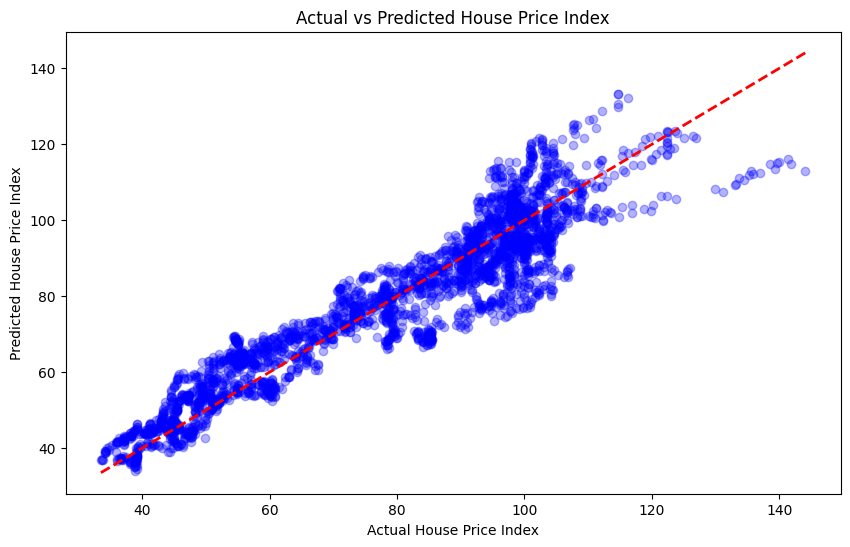

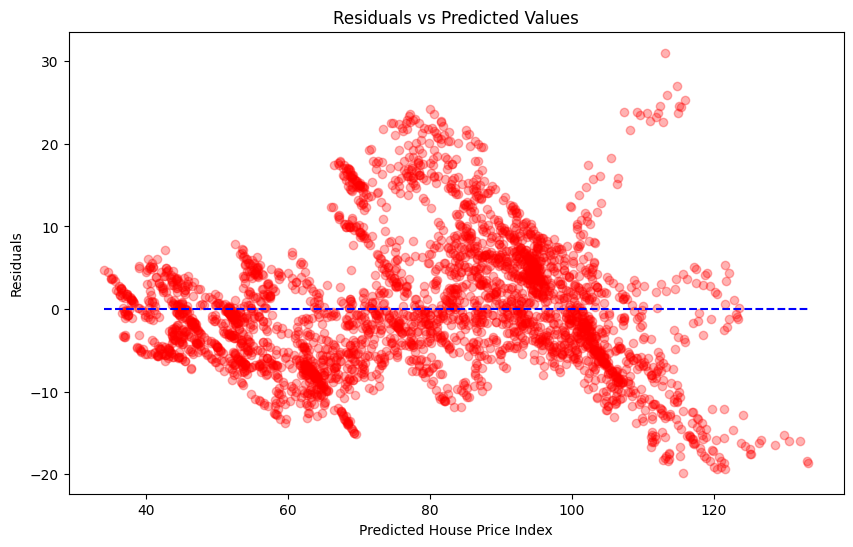

In [25]:
# Actual vs Predicted Plot
y_pred = model.predict(X_selected)  # Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual House Price Index')
plt.ylabel('Predicted House Price Index')
plt.title('Actual vs Predicted House Price Index')
plt.show()

# Residuals Plot
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3, color='red')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='blue', linestyles='dashed')
plt.xlabel('Predicted House Price Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()



In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for all the feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Removing features with high VIF
def remove_high_vif_features(X, threshold=10.0):
    while True:
        vif_data = calculate_vif(X)
        max_vif = vif_data["VIF"].max()
        
        if max_vif > threshold:
            # Find the feature with the highest VIF
            feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
            print(f"Dropping feature {feature_to_remove} with VIF {max_vif}")
            # Drop the feature with the highest VIF
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X

# Dropping 'const' column before calculating VIF
X_vif = X

# Removing high-VIF features and getting the remaining dataset
X_vif_selected = remove_high_vif_features(X_vif)

# Now adding the constant term back for model fitting
X_vif_selected = sm.add_constant(X_vif_selected)

# Refitting the model with the selected features
model_vif = sm.OLS(y, X_vif_selected).fit()

# Model summary
print(model_vif.summary())

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping feature GEO_Alberta with VIF inf
Dropping feature Day with VIF 2687702.3532001856
Dropping feature Month with VIF 90040.12139589549
Dropping feature Year with VIF 59.94684852881612
                            OLS Regression Results                            
Dep. Variable:        HousePriceIndex   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:07:36   Log-Likelihood:                -11538.
No. Observations:                3240   AIC:                         2.310e+04
Df Residuals:                    3228   BIC:                         2.317e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    

The code removes multicollinear features by calculating their Variance Inflation Factor (VIF). Features with a VIF above a specified threshold (e.g., 10) are iteratively removed. After eliminating high-VIF features, the regression model is refitted with the remaining features, and the model summary is displayed. This process helps reduce multicollinearity for a more reliable regression model.

C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


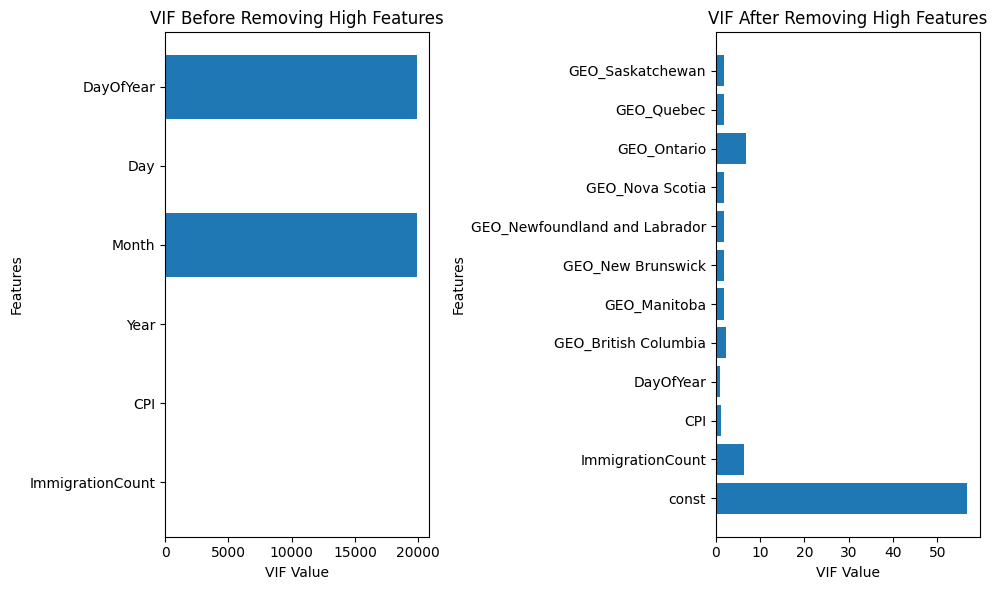

In [27]:
import matplotlib.pyplot as plt

# Calculating VIF for original features
vif_original = calculate_vif(X)

# Calculating VIF after dropping high VIF features
vif_selected = calculate_vif(X_vif_selected)

# Ploting VIF before and after removal
plt.figure(figsize=(10, 6))

# Plotting VIF of original features
plt.subplot(1, 2, 1)
plt.barh(vif_original["Feature"], vif_original["VIF"])
plt.title("VIF Before Removing High Features")
plt.xlabel("VIF Value")
plt.ylabel("Features")

# Plotting VIF after removal
plt.subplot(1, 2, 2)
plt.barh(vif_selected["Feature"], vif_selected["VIF"])
plt.title("VIF After Removing High Features")
plt.xlabel("VIF Value")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

This code calculates and visualizes the Variance Inflation Factor (VIF) for features in a dataset, comparing the VIF values before and after removing high VIF features:

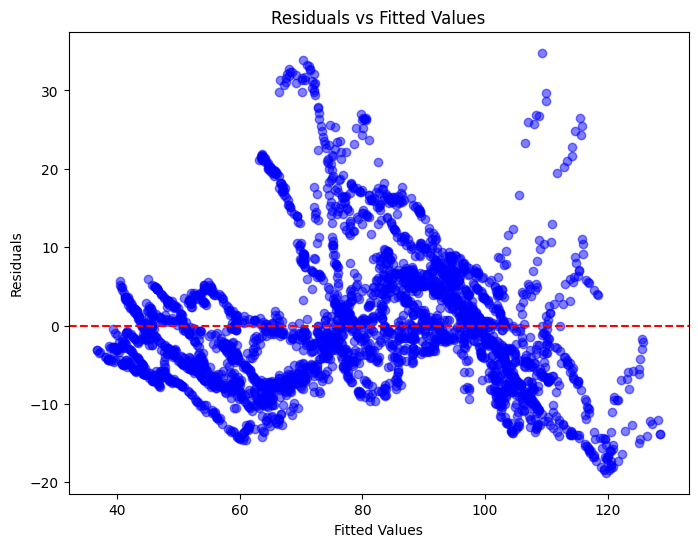

In [28]:
# Residuals from the fitted model
residuals = model_vif.resid

plt.figure(figsize=(8, 6))
plt.scatter(model_vif.fittedvalues, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

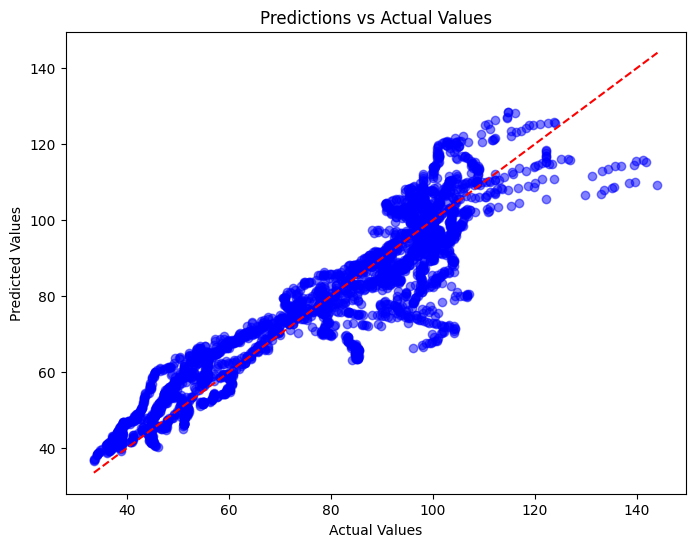

In [29]:
# Getting predicted values
y_pred_vif = model_vif.fittedvalues

# Plotting predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_vif, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title("Predictions vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

After trying both Ridge and Lasso techniques for normalization,we came to a conclusion the OLS model after taking out features with high VIF performs better for the current dataset

## 8. Decision-Tree Regressor Model📈 <a class="anchor" id="eight-bullet"></a>

In [30]:
print(df_encoded)

       REF_DATE  ImmigrationCount    CPI  HousePriceIndex  Year  GEO_Alberta  \
0    1992-01-01             51627   79.8             36.1  1992            1   
1    1992-02-01             51201   80.0             36.0  1992            1   
2    1992-03-01             52846   80.4             36.4  1992            1   
3    1992-04-01             55102   80.3             36.4  1992            1   
4    1992-05-01             55597   80.4             36.6  1992            1   
...         ...               ...    ...              ...   ...          ...   
3235 2021-08-01              2475  144.9            103.8  2021            0   
3236 2021-09-01              3161  145.4            103.0  2021            0   
3237 2021-10-01              3270  146.1            103.4  2021            0   
3238 2021-11-01              3366  146.8            103.5  2021            0   
3239 2021-12-01              3933  145.9            104.1  2021            0   

      GEO_British Columbia  GEO_Manitob

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming the data is loaded in df
# Define the target and features
target = 'HousePriceIndex'
features = ['ImmigrationCount', 'CPI', 'Year', 'Month', 'Day', 'DayOfYear', 
            'GEO_Alberta', 'GEO_British Columbia', 'GEO_Manitoba', 'GEO_New Brunswick', 
            'GEO_Newfoundland and Labrador', 'GEO_Nova Scotia', 'GEO_Ontario', 'GEO_Quebec', 'GEO_Saskatchewan']

X = df_encoded[features]
y = df_encoded[target]    

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

The code trains a Decision Tree Regressor to predict the HousePriceIndex using features like immigration count, CPI, and geographical data. It splits the data into training and testing sets (80/20), trains the model on the training set, and makes predictions on the test set.

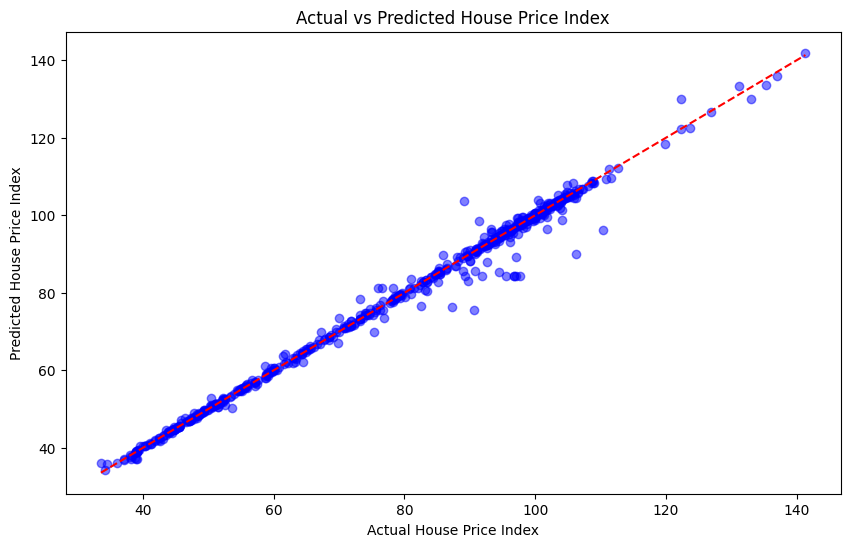

In [32]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted House Price Index')
plt.xlabel('Actual House Price Index')
plt.ylabel('Predicted House Price Index')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

Mean Squared Error: 4.414351851851852
R-squared: 0.9916132057587863


The code calculates two key regression evaluation metrics:

Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.

R-squared (R²): Indicates the proportion of variance in the target variable explained by the model.

Both metrics help assess the model's accuracy and fit.

In [34]:
model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# R-squared
r2 = model.score(X_test, y_test)
print(f'R-squared after pruning: {r2}')

R-squared after pruning: 0.9412318396259943


This code snippet trains a Decision Tree Regressor model on training data (X_train, y_train) with specific hyperparameters: a random state of 42, maximum depth of 5, minimum samples split of 10, and minimum samples per leaf of 5. After training, it makes predictions on the test data (X_test) and evaluates the model's performance by calculating the R-squared value using the score() method, which compares the model's predictions (y_pred) to the actual test values (y_test). The R-squared value indicates how well the model fits the test data, with higher values suggesting better performance.

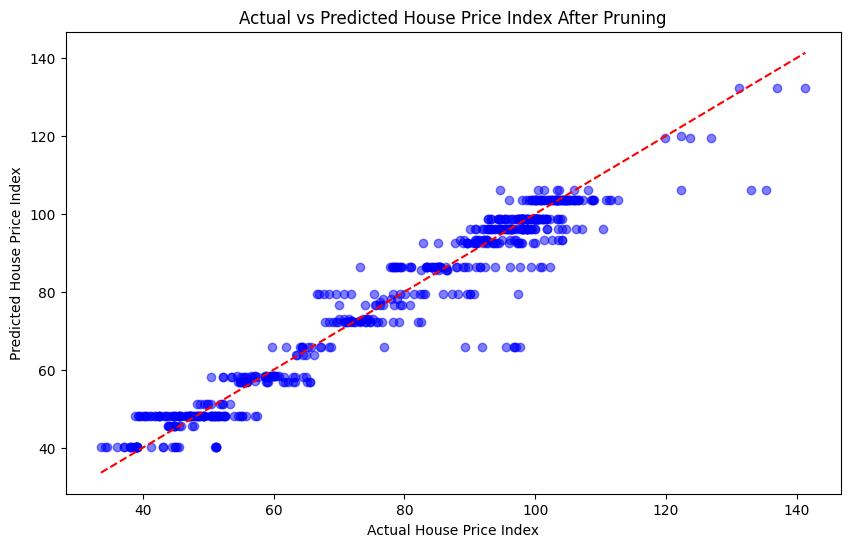

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted House Price Index After Pruning')
plt.xlabel('Actual House Price Index')
plt.ylabel('Predicted House Price Index')
plt.show()